In [1]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris() # アヤメのデータの読み込み
data = iris.data.astype(np.float32)
X = data[:, :3] # 最初の３つを説明変数とする
Y = data[:, 3].reshape(len(data), 1) # 最後の１つを目的変数とする

In [3]:
# 奇数番目のデータを教師データ、偶数番目のデータをテストデータとする
index = np.arange(Y.size)
X_train = X[index[index % 2 != 0], :] # 説明変数（教師データ）
X_test = X[index[index % 2 == 0], :] # 説明変数（テストデータ）
Y_train = Y[index[index % 2 != 0], :] # 目的変数（教師データ）
Y_test = Y[index[index % 2 == 0], :] # 目的変数（テストデータ）

In [4]:
import torch
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
Y_train = torch.from_numpy(Y_train).float()
Y_test = torch.from_numpy(Y_test).float()

In [6]:
X_train.shape

torch.Size([75, 3])

In [7]:
from torch.utils.data import TensorDataset
train = TensorDataset(X_train, Y_train)

In [20]:
train[0]

(tensor([4.9000, 3.0000, 1.4000]), tensor([0.2000]))

In [21]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train, batch_size=10, shuffle=True)

In [10]:
class MLR(torch.nn.Module):
    def __init__(self, n_input, n_output):
        super(MLR, self).__init__()
        self.l1 = torch.nn.Linear(n_input, n_output)

    def forward(self, x):
        return self.l1(x)

In [22]:
model = MLR(3, 1) # 入力が３変数、出力が１変数の線形重回帰モデル
criterion = torch.nn.MSELoss() # mean square error
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # 確率的勾配降下法

In [23]:
from torch.autograd import Variable
loss_history = []
for epoch in range(5000):
    total_loss = 0
    for x_train, y_train in train_loader:
        x_train = Variable(x_train)
        y_train = Variable(y_train)
        optimizer.zero_grad()
        y_pred = model(x_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    loss_history.append(total_loss)
    if (epoch +1) % 500 == 0:
        print(epoch + 1, total_loss)

500 0.37541517801582813
1000 0.4018739899620414
1500 0.3723290115594864
2000 0.39752556197345257
2500 0.350259181112051
3000 0.36842305585741997
3500 0.43721210211515427
4000 0.29759855568408966
4500 0.5460633803158998
5000 0.3709367187693715


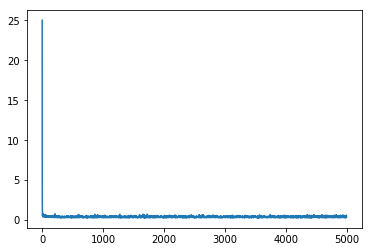

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(loss_history)

No handles with labels found to put in legend.


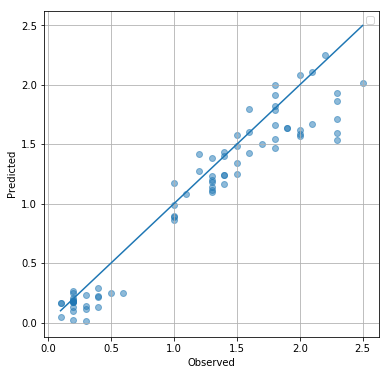

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(Y_train.flatten(), model.forward(X_train).data.flatten(), alpha=0.5)
plt.plot([min(Y), max(Y)], [min(Y), max(Y)])
plt.grid()
plt.legend()
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()